# Face Detection Challenge

In [1]:
import numpy as np 
import pandas as pd

### Objectives
-  visualize images
-  preprocess images for Neural Networks
-  fit a custom CNN for a regression task
-  fine-tune a analyse model performance

## 1. Visualize images

👉 Load the dataset (200 Mo)

In [2]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/images.csv")


data['pixels_list']=data['pixels'].apply(lambda x : x.split())

data['pixels_list_int']=data['pixels_list'].apply(lambda x : [int(i) for i in x])

Each row represent the image of a face in black and white
- `age` is the age in year
- `pixels` contains the 2304 (= 48 * 48) flatten values of each pixel in the image, in a black scale from 0 to 255, stored as string

❓ Plot the histogram of age in your dataset

In [70]:
data.head()

,age,pixels,images
0,1,129 128 128 126 127 130 133 135 139 142 145 14...,"[[0.5058823529411764, 0.5019607843137255, 0.50..."
1,1,164 74 111 168 169 171 175 182 184 188 193 199...,"[[0.6431372549019608, 0.2901960784313726, 0.43..."
2,1,67 70 71 70 69 67 70 79 90 103 116 132 145 155...,"[[0.2627450980392157, 0.27450980392156865, 0.2..."
3,1,193 197 198 200 199 200 202 203 204 205 208 21...,"[[0.7568627450980392, 0.7725490196078432, 0.77..."
4,1,202 205 209 210 209 209 210 211 212 214 218 21...,"[[0.792156862745098, 0.803921568627451, 0.8196..."


<AxesSubplot:xlabel='age', ylabel='Count'>

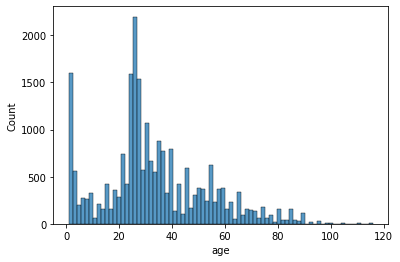

In [3]:
import seaborn as sns
sns.histplot(data.age)

❓ Visually display one image of your choice.

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

In [67]:
def image_trans(x):
    split=x.split()
    integer=[int(i)/255 for i in split]
    image=np.resize(integer,(48,48,1))
    return image    

In [71]:
data['images2']=data['pixels'].apply(image_trans)

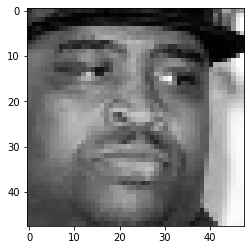

In [72]:
plt.imshow(data['images2'][10000], cmap='gray')

In [227]:
X_prep=data['images2']

In [228]:
X_prep.shape

(23705,)

In [229]:
X_prep[0].shape

(48, 48, 1)

In [230]:
X_flat=[]
for i in X:    
    X_flat.append(i)

In [233]:
X=np.asarray(X_flat)

In [234]:
X.shape

(23705, 48, 48, 1)

❓ What is the physical characteristic of the image at **index** `10000`?

In [88]:
gender="male"
smile=False

In [89]:
# Store your result in the variable below

# gender = "male"
# gender = "female"

# smile = True
# smile = False

In [90]:
from nbresult import ChallengeResult
result = ChallengeResult('C14',
                         gender=gender,
                         smile=smile)
result.write()

## 2. Processing

❓ Your goal is to train a convolutional neural network model to predict the age of a person based solely on a picture of his/her face.
- Create your feature matrix `X` as nparray of shape suited for a CNN, scaled between 0 and 1
- Create your target vector `y`
- Create a holdout set (`X_train`, `y_train`) (`X_test`, `y_test`) keeping `30%` in the test set, randomly sampled out of the whole dataset

😌 Don't worry, you will be given the solution in the next question in case you don't make it

In [235]:
X.shape

(23705, 48, 48, 1)

In [236]:
y=np.asarray(data['age'])

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [238]:
from nbresult import ChallengeResult
result = ChallengeResult('C1415', 
                         X_train_shape = X_train.shape,
                         y_train_shape = y_train.shape,
                         first_image = X_train[0]
                        )
result.write()

## Convolutional Neural Network for Age prediction

❓ Build a convolutional neural network

- Do not use transfer learning
- Store number of trainable parameters in a variable `params_number`
- Plot your metric & loss at each epoch
- make sure your model does not overfit with appropriate control techniques
- Compute the mean absolute error on your test set and store it as `mae_test`
- Compute, store and compare it with a `mae_baseline`

💡 You will not be judged by the computing power of your computer, but you should obtain significantly better performance than the baseline in less than 3 minutes, even without GPUs

👉 Feel free to start back from the solution by running the cell below (~500Mo download)

In [97]:
import pickle

file_names = ["images_X_train.pickle", "images_X_test.pickle", "images_y_train.pickle", "images_y_test.pickle"]
pickles = dict()

for file_name in file_names:
    url = f"https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/{file_name}"
    command = f"curl --output {file_name} {url}"
    ! eval {command}
    with open(file_name, 'rb') as handle:
        pickles[file_name] = pickle.load(handle)
    command = f"rm {file_name}"
    ! eval {command}
        
X_train, X_test, y_train, y_test = pickles.values()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  291M  100  291M    0     0  8573k      0  0:00:34  0:00:34 --:--:-- 11.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  125M  100  125M    0     0  9903k      0  0:00:12  0:00:12 --:--:-- 9732k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  129k  100  129k    0     0   452k      0 --:--:-- --:--:-- --:--:--  452k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57023  100 57023    0     0   238k      0 --:--:-- --:--:-- --:--:--  238k


In [187]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Sequential

def initialize_model():
    model=Sequential()
    # First convolution & max-pooling
    model.add(layers.Conv2D(48, (3,3), activation='relu', input_shape=(48, 48, 1), padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    # Second convolution & max-pooling
    model.add(layers.Conv2D(48, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dropout(rate=0.5))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))    
    
    return model

In [188]:
model=initialize_model()
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 48, 48, 48)        480       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 24, 24, 48)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 48)        20784     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 12, 12, 48)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 6912)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 100)               691300    
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)             

In [189]:
def compile_model(model):
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

In [190]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=3, restore_best_weights=True)

In [191]:
model=initialize_model()
compile_model(model)
history=model.fit(X_train[:5000],y_train[:5000],epochs=50,batch_size=16,verbose=2,validation_split=0.3,callbacks=[es])

Epoch 1/50
219/219 - 5s - loss: 516.7701 - mae: 17.4130 - val_loss: 401.1262 - val_mae: 15.1966
Epoch 2/50
219/219 - 6s - loss: 402.2664 - mae: 15.4442 - val_loss: 389.0418 - val_mae: 14.3642
Epoch 3/50
219/219 - 6s - loss: 325.8352 - mae: 13.9682 - val_loss: 464.4077 - val_mae: 16.4008
Epoch 4/50
219/219 - 5s - loss: 282.8236 - mae: 12.9133 - val_loss: 264.9171 - val_mae: 12.0035
Epoch 5/50
219/219 - 5s - loss: 255.1496 - mae: 12.2968 - val_loss: 261.7055 - val_mae: 12.0243
Epoch 6/50
219/219 - 5s - loss: 245.8304 - mae: 11.8993 - val_loss: 260.6699 - val_mae: 11.9716
Epoch 7/50
219/219 - 5s - loss: 233.3993 - mae: 11.5571 - val_loss: 242.7787 - val_mae: 11.5369
Epoch 8/50
219/219 - 6s - loss: 215.8501 - mae: 11.1495 - val_loss: 230.8118 - val_mae: 11.3014
Epoch 9/50
219/219 - 6s - loss: 211.5008 - mae: 10.9991 - val_loss: 311.3874 - val_mae: 13.4643
Epoch 10/50
219/219 - 6s - loss: 202.1968 - mae: 10.7524 - val_loss: 240.2462 - val_mae: 11.6798
Epoch 11/50
219/219 - 6s - loss: 187.93

In [192]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='best')
    plt.show()
    
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='best')
    plt.show()


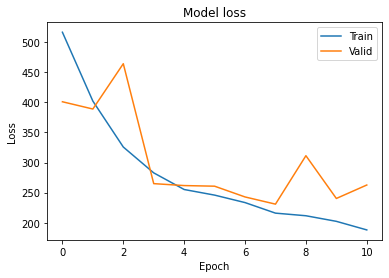

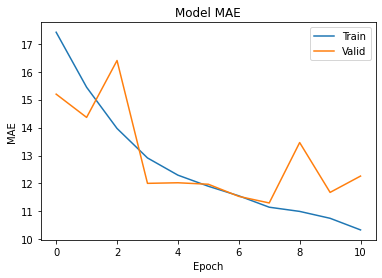

In [193]:
plot_loss_accuracy(history)

In [194]:
model.evaluate(X_test,y_test,verbose=0)

[228.56838989257812, 11.426390647888184]

In [135]:
average=y_test.mean()
total=0

for i in y_test:
    subtotal=abs(average-i)
    total=total+subtotal

mae_baseline=total/y_test.shape[0]
mae_baseline

15.354998238057787

In [139]:
mae_test=model.evaluate(X_test,y_test,verbose=0)[1]
mae_test

9.149538040161133

In [142]:
params_number=1708369

In [143]:
from nbresult import ChallengeResult
result = ChallengeResult('C1516',
                         params_number=params_number,
                         mae_baseline = mae_baseline,
                         mae_test = mae_test,
                        )
result.write()